In [114]:
import pdfplumber
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [87]:
PATH = os.getcwd()
base_infos = []
need_info = ['股票简称', '股票代码', '公司的法定代表人', '办公地址', '公司国际互联网网址', '电子信箱']
for file in os.listdir('2019'):
    info = {}
    if file.endswith('pdf'):
        with pdfplumber.open(os.path.join(PATH, '2019', file)) as pdf:
            print(file)
            for page in pdf.pages:
                if page.extract_text() and '第二节公司简介和主要财务指标' in page.extract_text() and page.extract_tables():
                    for table in page.extract_tables():
                        if table[0][0] == '股票简称':
                            for i in range(len(table)):
                                for j in range(len(table[i])):
                                    if table[i][j] in need_info:
                                        info[table[i][j]] = table[i][j+1]
                            base_infos.append(info)
                            break
                if page.extract_text() and '主要会计数据和财务指标' in page.extract_text() and page.extract_tables():
                    for table in page.extract_tables():
                        if table[0][1] == '2019年':
                            for i in range(len(table)):
                                if table[i][0] and '归属于上市公司股东的扣除' in table[i][0]:
                                    info['归属于上市公司股东的扣除非经常性损益的净利润（元）2019'] = table[i][1] if table[i][1] else table[i+1][1]
                                    info['归属于上市公司股东的扣除非经常性损益的净利润（元）2018'] = table[i][2] if table[i][2] else table[i+1][2]
                                    info['归属于上市公司股东的扣除非经常性损益的净利润（元）2017'] = table[i][4] if table[i][4] else table[i+1][4]
                            info['归属于上市公司股东的扣除非经常性损益的净利润（元）2019'] = float(''.join(info['归属于上市公司股东的扣除非经常性损益的净利润（元）2019'].split(',')))
                            info['归属于上市公司股东的扣除非经常性损益的净利润（元）2018'] = float(''.join(info['归属于上市公司股东的扣除非经常性损益的净利润（元）2018'].split(',')))
                            info['归属于上市公司股东的扣除非经常性损益的净利润（元）2017'] = float(''.join(info['归属于上市公司股东的扣除非经常性损益的净利润（元）2017'].split(',')))
                            break
                    break
            print(info)
    if len(base_infos) == 15:
        break
print(base_infos)

1.pdf
{}
10.pdf
{'股票简称': '同益股份', '股票代码': '300538', '公司的法定代表人': '邵羽南', '办公地址': '广东省深圳市宝安区新安街道海旺社区N12区新湖路99号壹方中心北区三期A塔1001', '公司国际互联网网址': 'www.tongyiplastic.com', '电子信箱': 'tongyizq@tongyiplastic.com', '归属于上市公司股东的扣除非经常性损益的净利润（元）2019': 39515624.44, '归属于上市公司股东的扣除非经常性损益的净利润（元）2018': 25256655.39, '归属于上市公司股东的扣除非经常性损益的净利润（元）2017': 14951997.14}
2.pdf
{'股票简称': '创业慧康', '股票代码': '300451', '公司的法定代表人': '葛航', '办公地址': '杭州市滨江区长河街道越达巷92号创业智慧大厦五楼', '公司国际互联网网址': 'https://www.bsoft.com.cn/', '电子信箱': 'bsoft@bsoft.com.cn', '归属于上市公司股东的扣除非经常性损益的净利润（元）2019': 260686956.46, '归属于上市公司股东的扣除非经常性损益的净利润（元）2018': 199612997.19, '归属于上市公司股东的扣除非经常性损益的净利润（元）2017': 154230633.21}
3.pdf
{'股票简称': '惠伦晶体', '股票代码': '300460', '公司的法定代表人': '赵积清', '办公地址': '广东省东莞市黄江镇黄江东环路68号', '公司国际互联网网址': 'http://www.dgylec.com', '电子信箱': 'yl@dgylec.com', '归属于上市公司股东的扣除非经常性损益的净利润（元）2019': -162431744.93, '归属于上市公司股东的扣除非经常性损益的净利润（元）2018': -101355424.97, '归属于上市公司股东的扣除非经常性损益的净利润（元）2017': 17348230.82}
300161：2019年年度报告.pdf
{'归属于上市公司股东的扣除非经常性损益的净利润（元）2019': -15209

In [88]:
df = pd.DataFrame(base_infos)

In [90]:
df = df.dropna()

In [116]:
df

股票简称    股票代码     公司的法定代表人                                       办公地址  \
0   同益股份  300538          邵羽南  广东省深圳市宝安区新安街道海旺社区N12区新湖路99号壹方中心北区三期A塔1001   
1   创业慧康  300451           葛航                   杭州市滨江区长河街道越达巷92号创业智慧大厦五楼   
2   惠伦晶体  300460          赵积清                          广东省东莞市黄江镇黄江东环路68号   
4   元力股份  300174          许文显                            福建省南平市陈坑至瓦口工业园区   
5   日科化学  300214          彭国锋                             山东省昌乐县英轩街3999号   
6   华录百纳  300291           方刚                          北京市朝阳区安家楼50号院A7-2   
7   晶盛机电  300316          曹建伟                       浙江省杭州市余杭区五常街道创智一号2号楼   
8   博腾股份  300363          居年丰   重庆市北碚区水土园区方正大道重庆博腾制药科技股份有限公司新药外包服务基地研发中心   
9   安控科技  300370          许永良                            北京市海淀区地锦路9号院6号楼   
10  四通新材  300428          臧立国                             保定市清苑区发展西街359号   
11  川环科技  300547          文谟统                              四川省达州市大竹县工业园区   
12  博创科技  300548  ZHU WEI(朱伟)                           浙江省嘉兴市南湖区亚太路306号   
13   万里马  300591          林大耀                广州市海珠区新港东路1028号保利世界贸易中心F座3层   
14  宣亚国际  300612           邬涛                        北京市朝阳区八里庄东里1号CN02-B   

                       公司国际互联网网址                        电子信箱  \
0          www.tongyiplastic.com  tongyizq@tongyiplastic.com   
1      https://www.bsoft.com.cn/          bsoft@bsoft.com.cn   
2          http://www.dgylec.com               yl@dgylec.com   
4           www.yuanlicarbon.com         dm@yuanlicarbon.com   
5        http://www.rikechem.com       rikechem@rikechem.com   
6            http://www.hlbn.cc/              hbndsh@hlbn.cc   
7            http://www.jsjd.cc/                jsjd@jsjd.cc   
8           http://www.porton.cn         porton.db@porton.cn   
9                  www.etrol.com              info@etrol.com   
10        http://www.stnm.com.cn            info@stnm.com.cn   
11             www.chuanhuan.com          chkj@chuanhuan.com   
12  http://www.broadex-tech.com/      stock@broadex-tech.com   
13     http://www.wanlima.com.cn    wlm_stock@wanlima.com.cn   
14    http://www.shunyagroup.com       stock@shunyagroup.com   

    归属于上市公司股东的扣除非经常性损益的净利润（元）2019  归属于上市公司股东的扣除非经常性损益的净利润（元）2018  \
0                    3.951562e+07                   2.525666e+07   
1                    2.606870e+08                   1.996130e+08   
2                   -1.624317e+08                  -1.013554e+08   
4                    5.413323e+07                   7.357472e+07   
5                    1.812093e+08                   4.874532e+07   
6                    4.315738e+07                  -1.846812e+09   
7                    6.095081e+08                   5.368076e+08   
8                    1.620884e+08                   7.204778e+07   
9                   -2.618711e+07                  -5.921808e+08   
10                   3.821663e+08                   5.172183e+07   
11                   7.303486e+07                   9.608929e+07   
12                  -2.772829e+06                  -7.409805e+06   
13                   2.248679e+07                   3.759705e+07   
14                   9.330361e+06                   1.700289e+07   

    归属于上市公司股东的扣除非经常性损益的净利润（元）2017  
0                    1.495200e+07  
1                    1.542306e+08  
2                    1.734823e+07  
4                    4.285730e+07  
5                    1.077699e+08  
6                    1.003881e+08  
7                    3.532786e+08  
8                    9.003161e+07  
9                    9.797797e+07  
10                   7.242648e+07  
11                   1.077106e+08  
12                   6.980457e+07  
13                   3.470306e+07  
14                   7.484544e+07

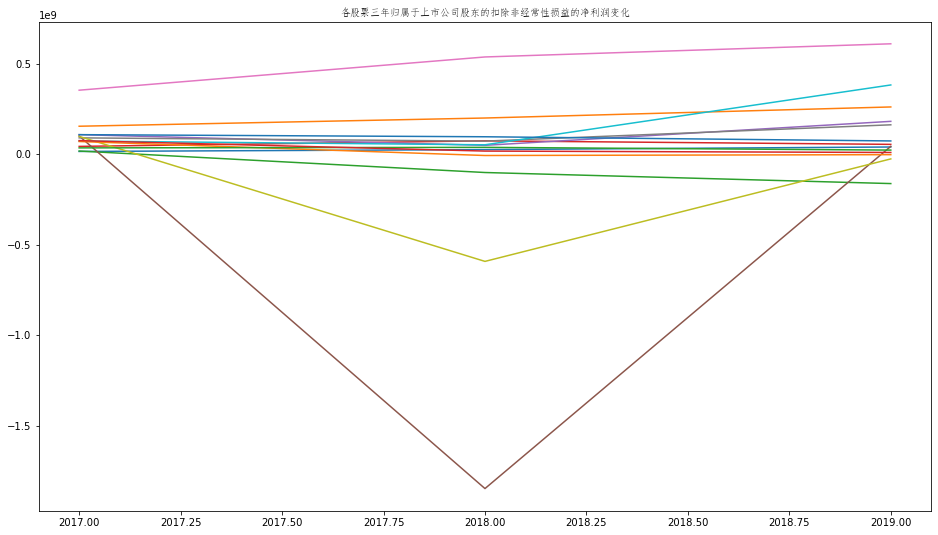

In [115]:
plt.figure(figsize=(16, 9))
zhfont1 = matplotlib.font_manager.FontProperties(fname="C:\WINDOWS\FONTS\SIMFANG.TTF") 
plt.title('各股票三年归属于上市公司股东的扣除非经常性损益的净利润变化', fontproperties=zhfont1)
for i in range(df.shape[0]):
    plt.plot([2019, 2018,2017], df.iloc[i, -3:])